# --- Notebook : Modèle Linéaire - Cas de Tests de Régression ---

In [1]:
# --- Notebook : Modèle Linéaire - Cas de Tests de Régression ---
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# === Chargement de la bibliothèque Rust compilée ===
lib = ctypes.CDLL("../target/release/mymodel.dll")

In [3]:
# === Déclaration des fonctions Rust (régression linéaire sans activation) ===
lib.create_linear_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]
lib.create_linear_model.restype = ctypes.c_void_p

lib.train_linear_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t, ctypes.c_size_t
]

lib.predict_linear_model.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.c_size_t]
lib.predict_linear_model.restype = ctypes.c_double

# Fonction pour entraîner, tester et visualiser un modèle

In [4]:
# === Fonction utilitaire pour entraîner, tester et visualiser un modèle ===
def test_linear_model(X, Y, name):
    print(f"\n--- {name} ---")
    model = lib.create_linear_model(X.shape[1], 0.1, 1000)
    X_flat = X.flatten().astype(np.float64)
    Y_float = Y.astype(np.float64)

    lib.train_linear_model(
        model,
        X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0], X.shape[1]
    )

    predictions = []
    for i in range(len(X)):
        x = X[i].astype(np.float64)
        pred = lib.predict_linear_model(
            model, x.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(x)
        )
        predictions.append(pred)
        print(f"Exemple {i} : Prédit = {pred:.3f}, Vrai = {Y[i]}")

    predictions = np.array(predictions)

    # Visualisation 2D si possible
    if X.shape[1] == 1:
        plt.figure()
        plt.title(name)
        plt.scatter(X[:, 0], Y, label="Vrai", color="blue")
        plt.plot(X[:, 0], predictions, label="Prédit", color="red")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True)
        plt.show()
    elif X.shape[1] == 2:
        plt.figure()
        plt.title(name)
        plt.scatter(range(len(Y)), Y, label="Vrai", color="blue")
        plt.plot(range(len(Y)), predictions, label="Prédit", color="red")
        plt.xlabel("Index")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True)
        plt.show()
    elif X.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(name)
        ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Vrai')
        ax.scatter(X[:, 0], X[:, 1], predictions, color='red', label='Prédit')
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("Y")
        ax.legend()
        plt.show()



# Linear Simple 2D


--- Linear Simple 2D ---
Exemple 0 : Prédit = 2.000, Vrai = 2
Exemple 1 : Prédit = 3.000, Vrai = 3


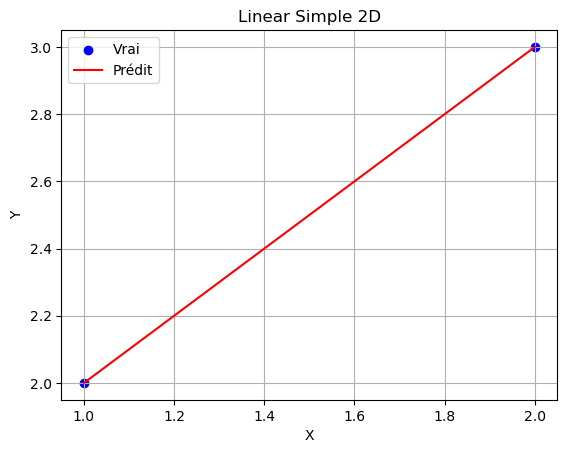

In [5]:
# === Cas 1 : Linear Simple 2D ===
X1 = np.array([
    [1],
    [2]
])
Y1 = np.array([2, 3])
test_linear_model(X1, Y1, "Linear Simple 2D")

# Non Linear Simple 2D


--- Non Linear Simple 2D ---
Exemple 0 : Prédit = -2.871, Vrai = 1
Exemple 1 : Prédit = 13.806, Vrai = 8
Exemple 2 : Prédit = 30.484, Vrai = 27


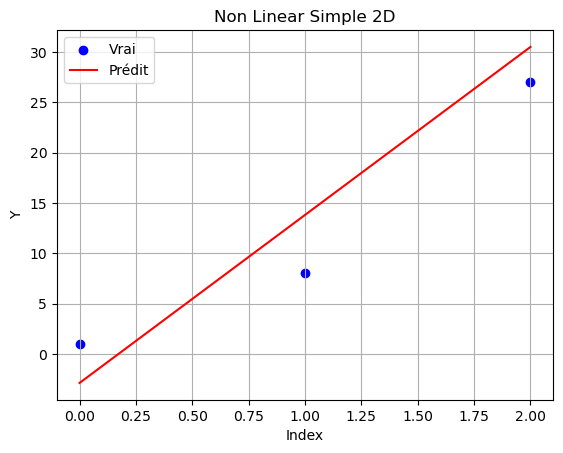

In [6]:
# === Cas 2 : Non Linear Simple 2D ===
X2 = np.array([
    [1, 1],
    [2, 2],
    [3, 3]
])
Y2 = np.array([1, 8, 27])  # y = x^3

test_linear_model(X2, Y2, "Non Linear Simple 2D")

# Linear Simple 3D


--- Linear Simple 3D ---
Exemple 0 : Prédit = 2.500, Vrai = 2.5
Exemple 1 : Prédit = 1.000, Vrai = 1.0
Exemple 2 : Prédit = 7.500, Vrai = 7.5
Exemple 3 : Prédit = 4.000, Vrai = 4.0
Exemple 4 : Prédit = 3.000, Vrai = 3.0


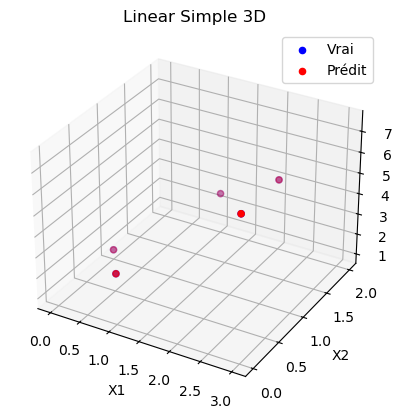

In [ ]:
# === Cas 3 : Linear Simple 3D ===
X_test = np.array([
    [1, 2, 3],
    [0, 1, 2],
    [3, 0, 1],
    [2, 2, 2],
    [1, 0, 0]
])

# Calcul de y avec la fonction y = 2*x1 - x2 + 0.5*x3 + 1
Y_test = np.array([
    2*1 - 2 + 0.5*3 + 1,   # 2 - 2 + 1.5 + 1 = 2.5
    2*0 - 1 + 0.5*2 + 1,   # 0 - 1 + 1 + 1 = 1.0
    2*3 - 0 + 0.5*1 + 1,   # 6 + 0 + 0.5 + 1 = 7.5
    2*2 - 2 + 0.5*2 + 1,   # 4 - 2 + 1 + 1 = 4.0
    2*1 - 0 + 0.5*0 + 1    # 2 + 0 + 0 + 1 = 3.0
])
test_linear_model(X_test, Y3, "Linear Simple 3D")

# Non Linear Simple 3D


--- Non Linear Simple 3D ---
Exemple 0 : Prédit = -42.667, Vrai = 4
Exemple 1 : Prédit = 69.000, Vrai = 27
Exemple 2 : Prédit = 180.667, Vrai = 64


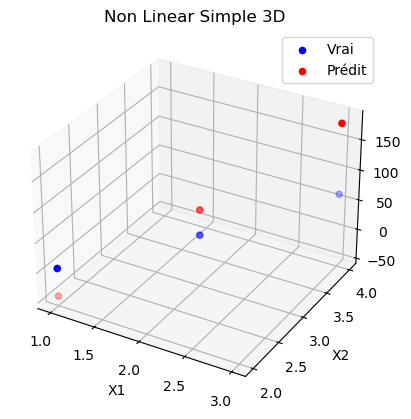

In [9]:
# === Cas 5 : Non Linear Simple 3D ===
X5 = np.array([
    [1, 2, 1],
    [2, 3, 2],
    [3, 4, 3]
])
Y5 = np.array([4, 27, 64])  # y = (x1 + x2)^2 * x3
test_linear_model(X5, Y5, "Non Linear Simple 3D")